<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Algoritmo_No_Supervisado_Cluster_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmo K-Means**

El algoritmo K-Means es un método de clustering no supervisado que se utiliza para dividir un conjunto de datos en K grupos distintos (donde K es el número de grupos predefinido) basándose en las características de los datos para minimizar la varianza intra-grupo y maximizar la varianza entre grupos. El objetivo es asignar los puntos de datos a los clusters de tal manera que la suma de las distancias cuadradas entre los puntos de datos y el centroide de su cluster (la media de todos los puntos de datos que pertenecen a ese cluster) sea mínima. Aquí hay una descripción paso a paso de cómo funciona el algoritmo:

1. **Inicialización**: Selecciona K puntos al azar del conjunto de datos como centroides iniciales de los clusters. A veces, esta selección puede influir en la calidad del resultado final, por lo que pueden utilizarse métodos como el algoritmo K-Means++ para una inicialización más eficiente.

2. **Asignación de clusters**: Asigna cada punto de datos al centroide del cluster más cercano, basándose en la distancia euclidiana u otra métrica de distancia apropiada.

3. **Actualización de centroides**: Calcula los nuevos centroides tomando la media de todos los puntos de datos asignados a cada cluster.

4. **Repetición**: Repite los pasos 2 y 3 hasta que los centroides no cambien significativamente en iteraciones sucesivas, lo que significa que se ha alcanzado la convergencia, o hasta que se cumpla algún otro criterio de parada, como un número máximo de iteraciones o una variación mínima entre las posiciones de los centroides.

5. **Resultado final**: Una vez que el algoritmo converge, proporciona una partición del conjunto de datos en K grupos, así como los centroides finales para cada grupo.

El K-Means es ampliamente utilizado debido a su simplicidad y eficiencia en la práctica. Sin embargo, tiene algunas limitaciones, como:

- La necesidad de especificar el número de clusters (K) de antemano.
- Sensibilidad a los centroides iniciales.
- No siempre converge hacia la solución óptima global, sino que puede alcanzar un óptimo local.
- Dificultades para manejar clusters de diferentes tamaños y densidades, así como formas no esféricas.

Debido a estas limitaciones, a menudo es importante ejecutar el algoritmo varias veces con diferentes inicializaciones aleatorias y comparar los resultados, o utilizar métodos de inicialización más avanzados como K-Means++. Además, la evaluación del número apropiado de clusters K puede realizarse mediante técnicas como el método del codo, la estadística de la silueta o el análisis de brechas.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


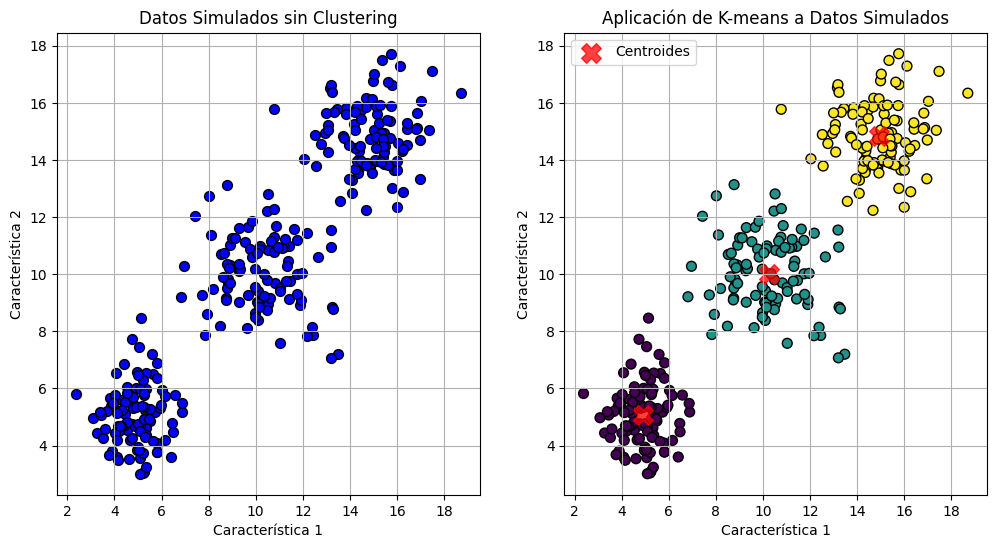

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generar datos simulados
np.random.seed(42)
X1 = np.random.normal(loc=5, scale=1, size=(100, 2))
X2 = np.random.normal(loc=10, scale=1.5, size=(100, 2))
X3 = np.random.normal(loc=15, scale=1.2, size=(100, 2))
X = np.vstack((X1, X2, X3))

# Aplicar k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizar los datos en un gráfico doble (subplots)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Datos Simulados sin Clustering
axes[0].scatter(X[:, 0], X[:, 1], color='blue', marker='o', edgecolor='k', s=50)
axes[0].set_title('Datos Simulados sin Clustering')
axes[0].set_xlabel('Característica 1')
axes[0].set_ylabel('Característica 2')
axes[0].grid(True)

# Aplicación de K-means a Datos Simulados
axes[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=50)
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X', label="Centroides")
axes[1].set_title('Aplicación de K-means a Datos Simulados')
axes[1].set_xlabel('Característica 1')
axes[1].set_ylabel('Característica 2')
axes[1].legend()
axes[1].grid(True)

#plt.tight_layout()
#plt.show()

# **¿Cómo calcular la cantidad de cluster?**

# **Método del codo (Elbow Method)**

El método del codo (Elbow Method) es una técnica heurística utilizada para determinar el número óptimo de clusters (K) en el algoritmo K-means. La idea central del método del codo es ejecutar el K-means sobre el conjunto de datos para un rango de valores de K (por ejemplo, K=1,2,3,...,10), y para cada valor de K calcular la suma de errores cuadráticos dentro de los clusters (SSE, por sus siglas en inglés "Sum of Squared Errors").

El SSE se define como la suma de las distancias cuadradas entre cada miembro de un cluster y el centroide de ese cluster. A medida que aumentamos el número de clusters, el SSE generalmente disminuye porque los puntos están más cerca de sus centroides respectivos. Sin embargo, a partir de un cierto número de clusters, la disminución del SSE se vuelve marginal, y ese punto se considera el "codo" (elbow), el cual es una buena indicación de que el número correspondiente de clusters es una elección adecuada para los datos.

Para identificar el "codo" se sigue este proceso:

1. Seleccionar un rango de valores de K.
2. Ejecutar el algoritmo K-Means para cada valor de K.
3. Calcular el SSE para cada K.
4. Graficar una línea con K en el eje horizontal y el SSE en el eje vertical.
5. Observar la forma de la curva y el punto donde se produce un cambio brusco en la pendiente de la curva, lo cual indica un decrecimiento marcado del SSE.

Este punto de cambio brusco sugiere que añadir más clusters no mejora significativamente la partición de los datos, y por ende, tomar más clusters más allá de este punto no se justifica.

Una crítica común del método del codo es que la elección del "mejor" número de clusters a veces puede ser subjetiva, ya que la curva no siempre tiene un codo claro y pronunciado. En tales casos, se pueden considerar otras técnicas y métricas, como la estadística de la silueta, el índice de Davies-Bouldin, o el análisis de brechas (gap statistic) para complementar o confirmar la decisión tomada por el método del codo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

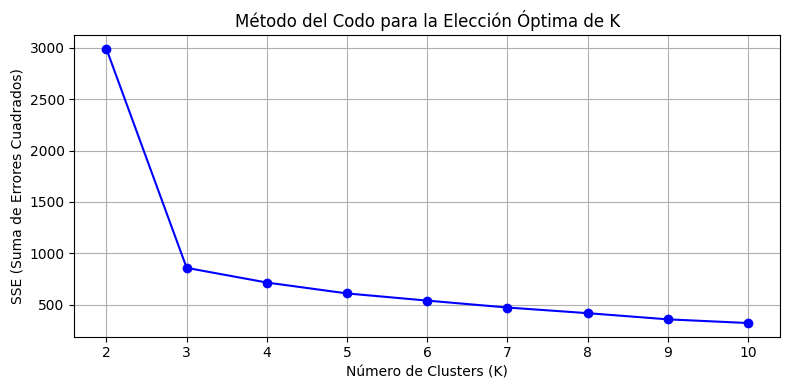

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generar datos simulados
np.random.seed(42)
X1 = np.random.normal(loc=5, scale=1, size=(100, 2))
X2 = np.random.normal(loc=10, scale=1.5, size=(100, 2))
X3 = np.random.normal(loc=15, scale=1.2, size=(100, 2))
X = np.vstack((X1, X2, X3))

# Preparar el rango de valores de K y listas para almacenar métricas
range_n_clusters = range(2, 11)
silhouette_avg_scores = []
sse = []

# Calcular métricas para cada K y ajustar el modelo
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    sse.append(kmeans.inertia_)  # Suma de las distancias cuadradas de las muestras al centroide más cercano

# Graficar el método del codo
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(range_n_clusters, sse, 'bo-')
ax1.set_title('Método del Codo para la Elección Óptima de K')
ax1.set_xlabel('Número de Clusters (K)')
ax1.set_ylabel('SSE (Suma de Errores Cuadrados)')
ax1.grid(True)

plt.tight_layout()
plt.show()


# **Coeficiente Silueta**

La métrica de silueta es un método de interpretación y validación de consistencia interna de los datos en un análisis de clustering. Proporciona una medida de qué tan bien cada objeto ha sido clasificado.

El coeficiente de silueta es una medida de cuán similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). El coeficiente toma valores entre -1 y 1, donde:

- Un valor cercano a +1 indica que el objeto está bien emparejado con su propio cluster y mal emparejado con los clusters vecinos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración de clustering es apropiada.
- Un valor de 0 indica que el objeto está en la frontera entre dos clusters.
- Un valor cercano a -1 indica que el objeto está mal emparejado con su propio cluster y debería haber sido clasificado en un cluster vecino.

Para interpretar estos valores en un análisis de clustering:

1. **Valores Altos**: Significan que el objeto se encuentra bien dentro de su cluster, con una alta cohesión y una buena separación de otros clusters.
2. **Valores Bajos o Negativos**: Indican que el objeto podría pertenecer a otro cluster, hay solapamiento entre clusters o los clusters están dispersos y no bien definidos.
3. **Valores Cercanos a Cero**: Significan que el objeto está cerca del límite de decisión entre dos clusters vecinos.

### Cómputo del Coeficiente Silueta para un punto de datos en clustering:

1. **Calcula la cohesión (a)**: Mide qué tan bien se ajusta un punto al cluster al que ha sido asignado. Se calcula como el promedio de la distancia (que puede ser distancia euclidiana, manhattan, etc., dependiendo de la métrica utilizada) entre el punto y todos los otros puntos en el mismo cluster.

2. **Calcula la separación (b)**: Determina qué tan bien se separa un punto de su cluster más cercano al que no pertenece. Se calcula como el promedio de la distancia entre el punto y todos los puntos en el cluster más cercano diferente del suyo.

3. **Computa el coeficiente de silueta (s)**: Para cada punto, el coeficiente de silueta se calcula utilizando la cohesión y la separación con la siguiente fórmula:

   \[ s = \frac{b - a}{\max(a, b)} \]

   Donde:
   - \( a \) es la distancia media del punto a los otros puntos en el mismo cluster (cohesión).
   - \( b \) es la distancia media del punto a los puntos en el cluster vecino más cercano (separación).

El coeficiente de silueta varía de -1 a 1. Si es cercano a 1, indica que el punto está bien emparejado con su propio cluster y lejos de los otros clusters. Si el coeficiente es cercano a 0, indica que el punto está cerca de la frontera de decisión entre dos clusters vecinos. Si el coeficiente es cercano a -1, sugiere que el punto ha sido asignado al cluster equivocado.

Para evaluar la calidad del clustering en su conjunto, se promedian los coeficientes de silueta de todos los puntos. Un valor promedio cercano a 1 sugiere un buen clustering, mientras que un valor cercano a 0 o negativo puede indicar un ajuste deficiente.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

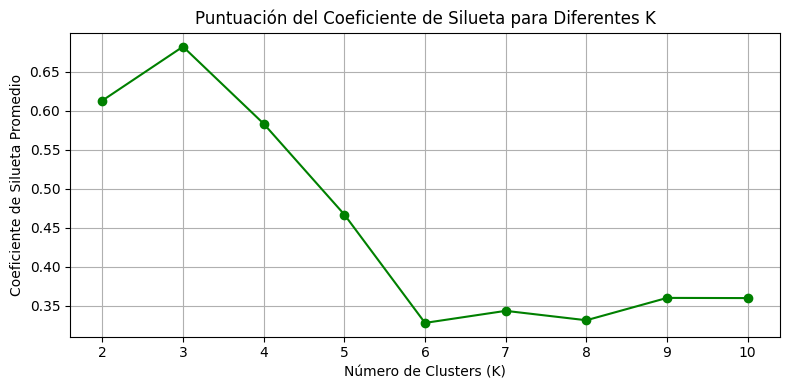

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generar datos simulados
np.random.seed(42)
X1 = np.random.normal(loc=5, scale=1, size=(100, 2))
X2 = np.random.normal(loc=10, scale=1.5, size=(100, 2))
X3 = np.random.normal(loc=15, scale=1.2, size=(100, 2))
X = np.vstack((X1, X2, X3))

# Preparar el rango de valores de K y listas para almacenar métricas
range_n_clusters = range(2, 11)
silhouette_avg_scores = []
sse = []

# Calcular métricas para cada K y ajustar el modelo
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    sse.append(kmeans.inertia_)  # Suma de las distancias cuadradas de las muestras al centroide más cercano

# Graficar el coeficiente de silueta
fig, ax2 = plt.subplots(figsize=(8, 4))
ax2.plot(range_n_clusters, silhouette_avg_scores, 'go-')
ax2.set_title('Puntuación del Coeficiente de Silueta para Diferentes K')
ax2.set_xlabel('Número de Clusters (K)')
ax2.set_ylabel('Coeficiente de Silueta Promedio')
ax2.grid(True)

plt.tight_layout()
plt.show()